# Amazon Books Review Analysis

## Importing Dependencies

In [1]:
!pip install vaderSentiment
!pip install wordcloud
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Reading Data from file

In [2]:
br = pd.read_csv(r"../Datasets/Books_rating.csv")
bd = pd.read_csv(r"../Datasets/books_data.csv")

In [3]:
br.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [4]:
bd.head(5)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


## **Data Pre-Processing**

### Merging both the dataset

In [5]:
books = pd.merge(br,bd, on = 'Title')
books.shape

(3000000, 19)

### extracting useful columns

In [6]:
df = books[['Title','review/score','review/text','authors','categories','ratingsCount']]

### Dropping Duplicates

In [7]:
df.drop_duplicates(inplace = True)
df.shape

C:\Users\nagaraj\AppData\Local\Temp\ipykernel_17252\3208856916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


(2617289, 6)

In [ ]:
df.isna().sum()

### Dropping Null Values

In [8]:
df.dropna(inplace = True)
df.isna().sum()

C:\Users\nagaraj\AppData\Local\Temp\ipykernel_17252\1508174486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


Title           0
review/score    0
review/text     0
authors         0
categories      0
ratingsCount    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325891 entries, 47 to 2999999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Title         1325891 non-null  object 
 1   review/score  1325891 non-null  float64
 2   review/text   1325891 non-null  object 
 3   authors       1325891 non-null  object 
 4   categories    1325891 non-null  object 
 5   ratingsCount  1325891 non-null  float64
dtypes: float64(2), object(4)
memory usage: 70.8+ MB


In [10]:
df.shape

(1325891, 6)

### Using only the fraction of dataset to reduce the running time on big data

In [11]:
data = df.sample(15000)
data.shape

(15000, 6)

### Removing brackets and colons from authors name

In [12]:
data['authors'] = data['authors'].str.extract(r'\'(.*)\'')

### Removes brackets and colons from categories

In [13]:
data['categories'] = data['categories'].str.extract(r'\'(.*)\'')

### Counting the length of each review

In [ ]:
data['word_count'] = data['review/text'].apply(lambda x: len(x.split(' ')))

In [14]:
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount
1158330,Learning the vi Editor,5.0,I have used this book at my workplace for some...,"Arnold Robbins', 'Elbert Hannah', 'Linda Lamb",Computers,2.0
1121827,A Separate Peace,1.0,I read this book in my 11th grade English clas...,John Knowles,Fiction,6.0
384219,Die in Plain Sight : A Novel of Suspense (LOWE...,5.0,Another wonderful suspense/ romance from Eliza...,Elizabeth Lowell,Fiction,3.0
691862,Holidays on Ice,3.0,"I intended the item to be a Christmas gift, bu...",David Sedaris,Humor,3294.0
136736,The Princess Bride,5.0,"With over 500 reviews already on the board, th...","Cary Elwes', 'Joe Layden",Biography & Autobiography,34.0


In [16]:
data.to_csv('../Datasets/cleaned_data/cleaned_data.csv', index=False)

# **EDA**

## Distribution of Books in Market based on Genre

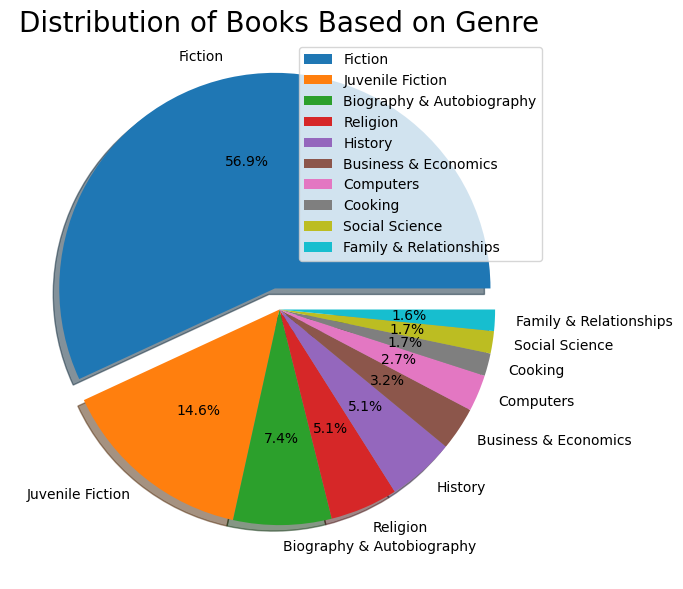

In [17]:
plt.figure(figsize=(7,7))
labels=['Fiction','Juvenile Fiction','Biography & Autobiography','Religion','History','Business & Economics','Computers','Cooking','Social Science','Family & Relationships']
plt.pie(data['categories'].value_counts().head(10),explode=(0.1,0,0,0,0,0,0,0,0,0), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Books Based on Genre', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

## Most frequent Words in over 3 rated Reviews

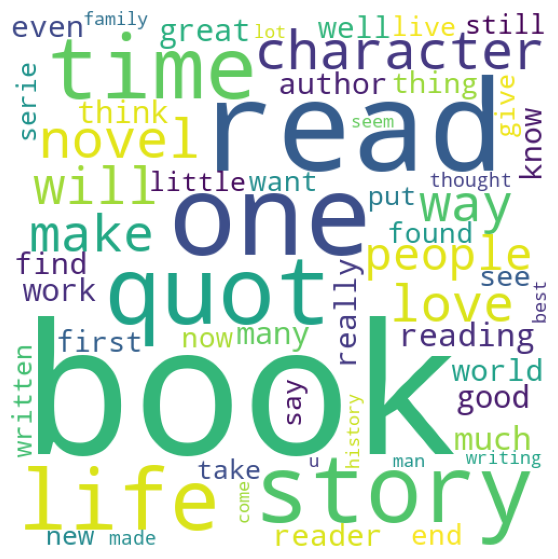

In [18]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(data[data['review/score'] > 3]['review/text'].str.cat(sep=" "))

plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(spam_wc)

## Most Reviewed Books

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns  
plt.figure(figsize=(7, 7))
cou = data[data['word_count'] > 1707][['Title', 'word_count']].sort_values(by='word_count', ascending=False)
colors = sns.color_palette('husl', n_colors=len(cou))
bars = plt.bar(cou['Title'], cou['word_count'], color=colors)
plt.title('Most Reviewed Books by Word Count', fontsize=20)
plt.xticks(rotation=90)
plt.show()

KeyError: 'word_count'

<Figure size 700x700 with 0 Axes>

## Highest Rated Books with over 4000 ratings each Book

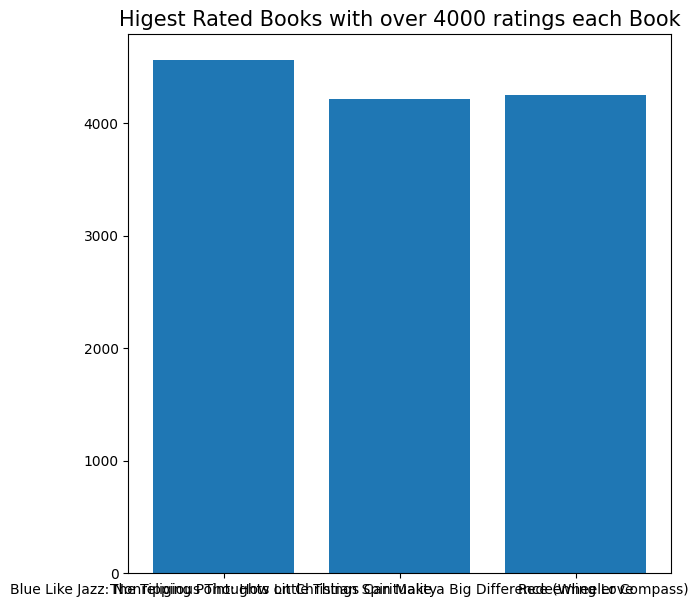

In [20]:
plt.figure(figsize = (7, 7))
rating_counts = data[data['ratingsCount'] > 4000][['Title','ratingsCount']].drop_duplicates()
plt.bar(rating_counts['Title'],rating_counts['ratingsCount'])
plt.title('Higest Rated Books with over 4000 ratings each Book', fontsize = 15)
plt.show()

## In which Genres readers give Positive and Negative Ratings

In [ ]:
# Convert 'review/score' column to numeric (if applicable)
data['review/score'] = pd.to_numeric(data['review/score'], errors='coerce')

# Filter out non-numeric values (if any)
numeric_data = data.dropna(subset=['review/score'])

# Group by 'categories' and compute the mean of 'review/score'
avg_cat_rating = numeric_data.groupby('categories')['review/score'].mean().sort_values(ascending=False).head(10)
avg_cat_rating_d = numeric_data.groupby('categories')['review/score'].mean().sort_values().head(10)

# Plot the bar chart for top and bottom categories
plt.figure(figsize=(10, 10))
plt.bar(avg_cat_rating.index, avg_cat_rating, color='blue', label='Top 10')
plt.bar(avg_cat_rating_d.index, avg_cat_rating_d, color='red', label='Bottom 10')
plt.title('Average Ratings on Book Genres', fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Ratings')
plt.legend()
plt.show()

## Top 10 Authors with 5 star Ratings

In [ ]:
# Convert 'review/score' column to numeric, coercing errors to NaN
data['review/score'] = pd.to_numeric(data['review/score'], errors='coerce')

# Group by 'authors', compute the mean of 'review/score', and plot the top 10 authors
top_authors = data.groupby('authors')['review/score'].mean().nlargest(10)
top_authors.plot(kind='barh', figsize=(7, 7))
plt.title('Top 10 Authors with Highest Average Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Authors')
plt.show()

## Top 10 Authors with 1 star Ratings

In [ ]:
# Grouping the data by authors and calculating the mean review score for each author
average_scores_by_author = data.groupby('authors')['review/score'].mean()

# Sorting the authors based on their average review scores and selecting the bottom 10 (lowest scores)
bottom_10_authors = average_scores_by_author.sort_values(ascending=True).head(10)

# Creating a horizontal bar plot to show the top 10 authors with the lowest average review scores
bottom_10_authors.plot(kind='barh', figsize=(7,7))

# Setting the title for the plot
plt.title('Top 10 Authors with 1-star Ratings', fontsize=15)

# Displaying the plot
plt.show()


## Number of Books written by each Author

In [ ]:
data['authors'].value_counts().head(20).sort_values(ascending = True).plot(kind='barh', figsize=(7,7))
plt.title('Number of Books written by the Authors', fontsize = 15)
plt.ylabel('Name Of Author')
plt.xlabel('Number of Books Written')
plt.show()

# **Sentiment Analysis**

In [ ]:
pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [ ]:
data.head(2)

In [ ]:
# Lower casing the reviews
data['clean_reviews'] = data['review/text'].str.lower()
# Calculating Polarity score of reviews
data['score'] = data['clean_reviews'].apply(lambda review: vader.polarity_scores(review))
# Extracting compound column
data['compound']  = data['score'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
# if compound value is more than 0.05 then it precive as positive
# if compound value is less than -0.0 then it precive as negative
# if compound value is equal to 0.0 then it precive as neutral

data['Sentiment'] = data['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x < -0.05 else 'neutral')
data.head()

## Distribution of Negative, Neutral and Positive Sentiment in whole corpus

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and subplots with 1 row and 2 columns
plt.figure(figsize=(12, 5))

# Plot 1 - Pie chart for sentiment distribution
plt.subplot(1, 2, 1)
labels = ['Positive', 'Negative', 'Neutral']
sizes = data['Sentiment'].value_counts()
colors = ['green', 'red', 'blue']
explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Sentiment Distribution')

# Plot 2 - Histogram for sentiment distribution
plt.subplot(1, 2, 2)
positive = data[data['compound'] > 0]['compound']
negative = data[data['compound'] < 0]['compound']
neutral = data[data['compound'] == 0]['compound']

sentiments = [positive, negative, neutral]
colors = ['green', 'red', 'orange']
labels = ['Positive Sentiments', 'Negative Sentiments', 'Neutral Sentiments']

for sentiment, color, label in zip(sentiments, colors, labels):
    plt.hist(sentiment, bins=20, color=color, alpha=0.5, label=label)

plt.title('Sentiment Distribution')
plt.xlabel('Compound')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
data['Sentiment'].value_counts().plot(kind = 'bar', figsize = (8,5))
plt.xticks(rotation = 'horizontal')
plt.title('Sentiment Distribution',fontsize = 15)
plt.grid()
plt.show()

## Most number of **Positive** Reviews on the Books

In [ ]:
data[data['Sentiment'] == 'positive']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (7,7))
plt.title('Number of Positive Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

## Most number of **Neutral** Reviews on the Books

In [ ]:
data[data['Sentiment'] == 'neutral']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (7,7))
plt.title('Number of Neutral Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

## Most number of **Negative** Reviews on the Books

In [ ]:
data[data['Sentiment'] == 'negative']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (7,7))
plt.title('Number of Negative Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

## Dataframe of Reviews vs Sentiments

In [ ]:
reviews_df = data[['clean_reviews', 'Sentiment']]

In [ ]:
reviews_df.head()

## Dividing Data into x & y 

In [ ]:
x = reviews_df.drop(['Sentiment'], axis=1)
y = reviews_df['Sentiment']

In [ ]:
x.shape

In [ ]:
y.shape

# **text - preprocessing**

In [ ]:
import numpy as np # basic Libraries
import pandas as pd
import seaborn as sns
import nltk

In [ ]:
!pip install -U nltk

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

In [ ]:
import re # regular expression module
stemmer = nltk.SnowballStemmer("english") # for stemming
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english')) # for stopword

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import re, string, unicodedata
from string import punctuation

In [ ]:
def hapus_url(text):
    return re.sub(r'http\S+','', text)

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-Z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

def lemmi(text):
    lemmatizer = WordNetLemmatizer()
    text=' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

def final_clean(text):
    final_text= []
    for i in text.split():
        if i.strip().lower() not in stopword and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

In [ ]:
def clean(text):
    text = hapus_url(text)
    text = remove_special_characters(text, remove_digits=True)
    text = lemmi(text)
    text = final_clean(text)
    return text

In [ ]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

In [ ]:
x["clean_reviews"] = x["clean_reviews"].apply(clean)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

In [ ]:
x_train

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer()  # You can adjust the max_features parameter

x_train_tfidf = tfidf_vectorizer.fit_transform(x_train['clean_reviews'])

# Transform the 'clean_reviews' column on the testing data
x_test_tfidf = tfidf_vectorizer.transform(x_test['clean_reviews'])

In [ ]:
x_train_tfidf_df = pd.DataFrame(x_train_tfidf.toarray())
x_test_tfidf_df =  pd.DataFrame(x_test_tfidf.toarray())

## Balancing Data

### Using Smote for Balancing Data

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_bal, y_train_bal = oversample.fit_resample(x_train_tfidf, y_train)
y_train_bal.value_counts()

In [ ]:
x_test_bal, y_test_bal = oversample.fit_resample(x_test_tfidf, y_test)
y_test_bal.value_counts()

## **Model Training**

## 1) Logistic Regression

### Applying Logistic Regression on Imbalanced Data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
log = LogisticRegression()
log.fit(x_train_tfidf_df, y_train)

In [ ]:
perd_log=log.predict(x_test_tfidf_df)

In [ ]:
print(classification_report(perd_log, y_test))

### Applying Logistic Regression on Balanced Data

In [ ]:
log_bal = LogisticRegression()
log_bal.fit(x_train_bal, y_train_bal)

In [ ]:
perd_log_bal =log_bal.predict(x_test_bal)

In [ ]:
print(classification_report(perd_log_bal, y_test_bal))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test_bal,perd_log_bal)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test_bal, perd_log_bal, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
disp.plot()

## 2) Decision Tree

### Decision tree on imbalanced Data

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=45)
classifier.fit(x_train_tfidf_df, y_train)

In [ ]:
pred_tre = classifier.predict(x_test_tfidf_df)

In [ ]:
print(classification_report(pred_tre, y_test))

In [ ]:
confusion_matrix(y_test,pred_tre)

In [ ]:
cm = confusion_matrix(y_test, pred_tre, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

### Decision tree on balanced data

In [ ]:
classifier_bal= DecisionTreeClassifier(criterion='entropy', random_state=45)
classifier_bal.fit(x_train_bal, y_train_bal)

In [ ]:
pred_tre_bal = classifier_bal.predict(x_test_bal)

In [ ]:
print(classification_report(pred_tre_bal, y_test_bal))

In [ ]:
confusion_matrix(y_test_bal,pred_tre_bal)

In [ ]:
cm = confusion_matrix(y_test_bal, pred_tre_bal, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

## 3) Naive Bayes

### Naive bayes on imbalanced Data

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(x_train_tfidf_df, y_train)

In [ ]:
pred_nb = nb.predict(x_test_tfidf_df)

In [ ]:
print(classification_report(pred_nb, y_test))

### Naive Bayes on Balanced Data

In [ ]:
import numpy as np

# Assuming x_train_bal is your sparse matrix
x_train_bal_dense = x_train_bal.toarray()

# Then proceed with fitting the model using the dense array
nb_bal = GaussianNB()
nb_bal.fit(x_train_bal_dense, y_train_bal)

In [ ]:
pred_nb_bal = nb_bal.predict(x_test_bal.toarray())

In [ ]:
print(classification_report(pred_nb_bal, y_test_bal))

## 4) RandomForest 

### RandomForest on Imbalanced Data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_train_tfidf_df.shape

In [ ]:
x_test_tfidf_df.shape

In [ ]:
ran=RandomForestClassifier(n_estimators=100)
ran.fit(x_train_tfidf_df,y_train)

In [ ]:
perd_ran=ran.predict(x_test_tfidf_df)

In [ ]:
perd_ran.shape

In [ ]:
confusion_matrix(y_test,perd_ran)

In [ ]:
cm = confusion_matrix(y_test, perd_ran, labels=ran.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ran.classes_)
disp.plot()

In [ ]:
y_test.shape , perd_ran.shape

In [ ]:
print(classification_report(perd_ran, y_test))

### RandomForest on balanced Data

In [ ]:
ran_bal=RandomForestClassifier(n_estimators=100)
ran_bal.fit(x_train_bal,y_train_bal)
perd_ran_bal=ran_bal.predict(x_test_bal)

In [ ]:
confusion_matrix(y_test_bal,perd_ran_bal)

In [ ]:
cm = confusion_matrix(y_test_bal, perd_ran_bal, labels=ran.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ran.classes_)
disp.plot()

In [ ]:
print(classification_report(perd_ran_bal, y_test_bal))

### Saving the best model

In [ ]:
import pickle

In [ ]:
pickle.dump(log_bal, open('log_bal.pkl','wb'))

In [ ]:
with open('log_bal','wb') as f:
  pickle.dump(log_bal,f)

In [ ]:
with open('log_bal','rb') as f:
  mp=pickle.load(f)

In [ ]:
def predict(text):
  input_text = [text]
  text_to_vec = tfidf_vectorizer.transform(input_text).toarray() 
  prediction = mp.predict(text_to_vec)
  return prediction

In [ ]:
User_input = input("Enter your text:")
output = predict(User_input)
print(output)